In [1]:
#importing required dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the data
df=pd.read_csv('sales_data.csv')

### 1.Basic Analysis of the Data

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df.shape

(9800, 18)

In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [7]:
#check for null values.
df.isnull().sum()
#There are 11 missing values in the Postal_Code column..

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

<AxesSubplot:>

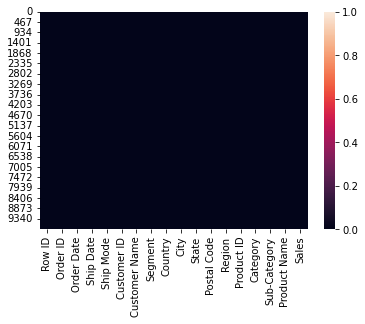

In [8]:
sns.heatmap(df.isnull())

In [9]:
#check for duplicate values.
df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


In [10]:
#There is no duplicate value in our dataset..

In [11]:
df['Ship Mode'].value_counts()

Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64

In [12]:
df['Customer ID'].nunique()

793

In [13]:
df['Customer Name'].nunique()

793

In [14]:
df['Segment'].value_counts()

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

In [15]:
df['Country'].value_counts()
#All the new data points are belongs to 1 country : United States

United States    9800
Name: Country, dtype: int64

In [16]:
df['City'].value_counts()
#We have data of 529 different cities..

New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
San Mateo          1
Cheyenne           1
Conway             1
Melbourne          1
Springdale         1
Name: City, Length: 529, dtype: int64

In [17]:
df['State'].value_counts().sort_index()

Alabama                   61
Arizona                  223
Arkansas                  60
California              1946
Colorado                 179
Connecticut               82
Delaware                  93
District of Columbia      10
Florida                  373
Georgia                  177
Idaho                     21
Illinois                 483
Indiana                  135
Iowa                      26
Kansas                    24
Kentucky                 137
Louisiana                 41
Maine                      8
Maryland                 105
Massachusetts            135
Michigan                 253
Minnesota                 89
Mississippi               53
Missouri                  66
Montana                   15
Nebraska                  38
Nevada                    39
New Hampshire             27
New Jersey               122
New Mexico                37
New York                1097
North Carolina           247
North Dakota               7
Ohio                     454
Oklahoma      

In [18]:
df['State'].nunique()
# There are 49 states in our data..

49

In [19]:
df['Postal Code'].nunique()

626

In [20]:
df['Region'].value_counts()

West       3140
East       2785
Central    2277
South      1598
Name: Region, dtype: int64

In [21]:
df['Product ID'].nunique()
#There are 1861 unique product ids..

1861

In [22]:
df['Category'].value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

In [23]:
df['Sub-Category'].value_counts()

Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: Sub-Category, dtype: int64

In [24]:
df['Product Name'].nunique()

1849

In [25]:
df['Sales'].dtype
# Sales column contains floating values..

dtype('float64')

### 2. Feature Engineering and Data Cleaning..

In [26]:
df['Row ID'].nunique()

9800

In [27]:
#Let's drop this column as we have already index column..
df.drop(columns=['Row ID'],axis=1,inplace=True)

In [28]:
df.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96


In [29]:
print(type(df['Order Date'][0]))
print(type(df['Ship Date'][0]))

<class 'str'>
<class 'str'>


In [30]:
#Both the date columns are object type. Let's change the datatype of these columns...

In [31]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])

In [32]:
print(type(df['Order Date'][0]))
print(type(df['Ship Date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [33]:
df['Postal Code'].isnull().sum()
#There are 11 missing/null values in this Postal_Code row..

11

In [34]:
df[~(df['Postal Code'].notna())]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,CA-2018-104066,2018-05-12,2018-10-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,CA-2016-162887,2016-07-11,2016-09-11,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,US-2017-150140,2017-06-04,2017-10-04,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [35]:
df[df['City']=='Burlington']['Postal Code'].mode().values[0]

27217.0

In [36]:
# As all the missing values are from one City::'Burlington'. 
#That is why let's replace the missing values with the mode of all the values present in the dataframe for City : "Burlington"

In [37]:
df['Postal Code'].fillna(df[df['City']=='Burlington']['Postal Code'].mode().values[0],inplace=True)

In [38]:
df['Postal Code'].isnull().sum()

0

In [39]:
#Now we do not have any missing values in our data..
#However the Postal Code should be integer type data..
df['Postal Code']=df['Postal Code'].astype('int32')

In [40]:
#finally check the final df..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Order Date     9800 non-null   datetime64[ns]
 2   Ship Date      9800 non-null   datetime64[ns]
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal Code    9800 non-null   int32         
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub-Category   9800 non-null   object        
 15  Product Name   9800 n

In [86]:
df['Product Name']=df['Product Name'].str.replace("'",'"')
#To handle the error in SQL we need to replace single quote with double quote.. Thanks to Google..
# ERROR  : unterminated CSV quoted field...

In [89]:
df.to_csv('superstore_sales_data_updated.csv',index=False)

### 3. EDA

In [41]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales'],
      dtype='object')

In [42]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

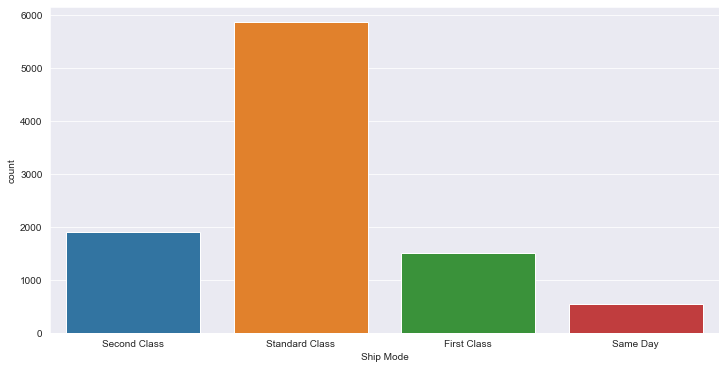

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(x='Ship Mode',data=df)
#Standard class shipping has been used most.

<AxesSubplot:xlabel='Segment', ylabel='count'>

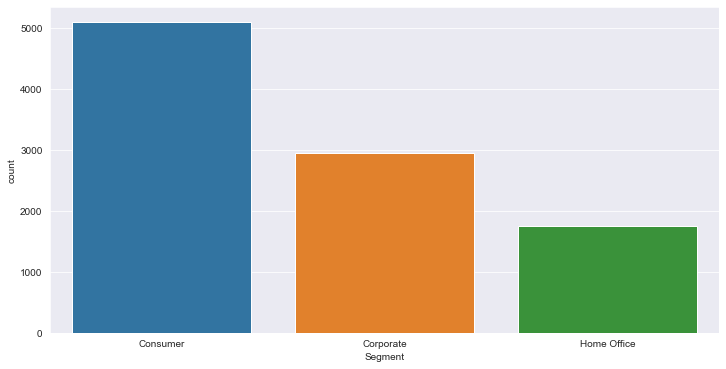

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(x='Segment',data=df)
#Consumer segment products sold most.

<AxesSubplot:xlabel='Segment', ylabel='count'>

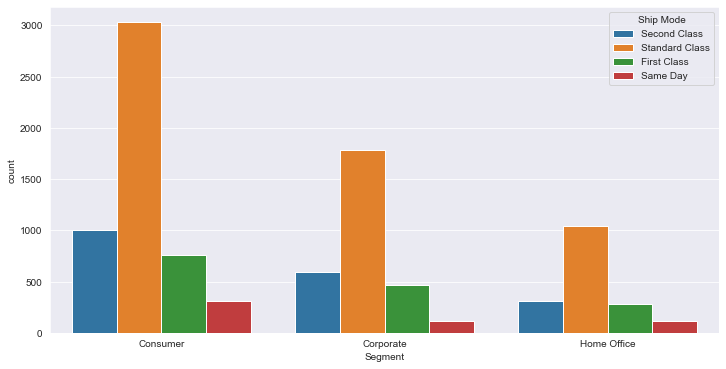

In [45]:
plt.figure(figsize=(12,6))
sns.countplot(x='Segment',data=df,hue='Ship Mode')
#In every segment Standard Class shipping has been used most and same day shipping has been used least.

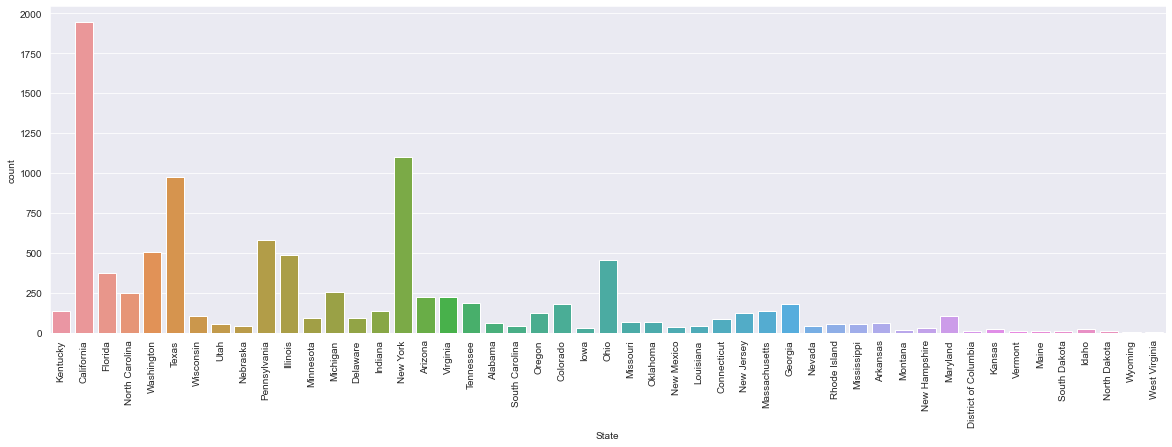

In [46]:
plt.figure(figsize=(20,6))
sns.countplot(x='State',data=df)
plt.xticks(rotation=90)
plt.show()
#Among all the States maximum order placed from California.

<AxesSubplot:xlabel='Region', ylabel='count'>

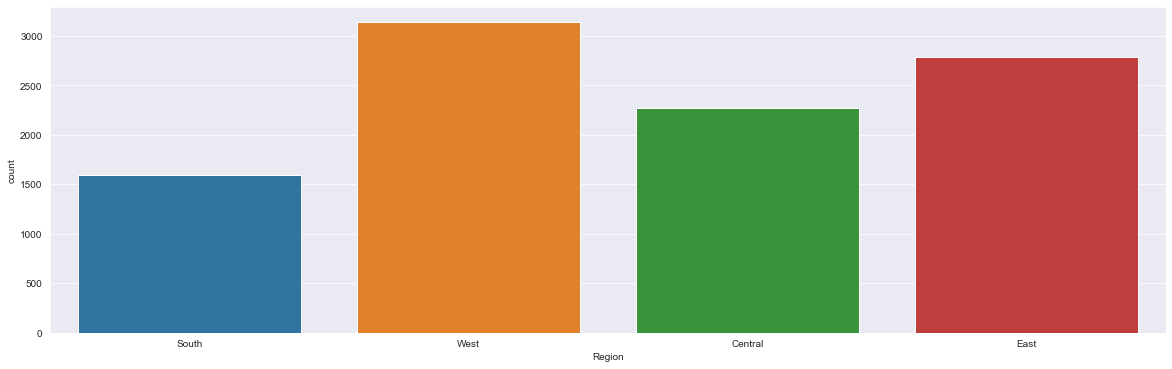

In [47]:
plt.figure(figsize=(20,6))
sns.countplot(x='Region',data=df)
#Among all the regions from the west region most orders are placed.

<AxesSubplot:xlabel='Category', ylabel='count'>

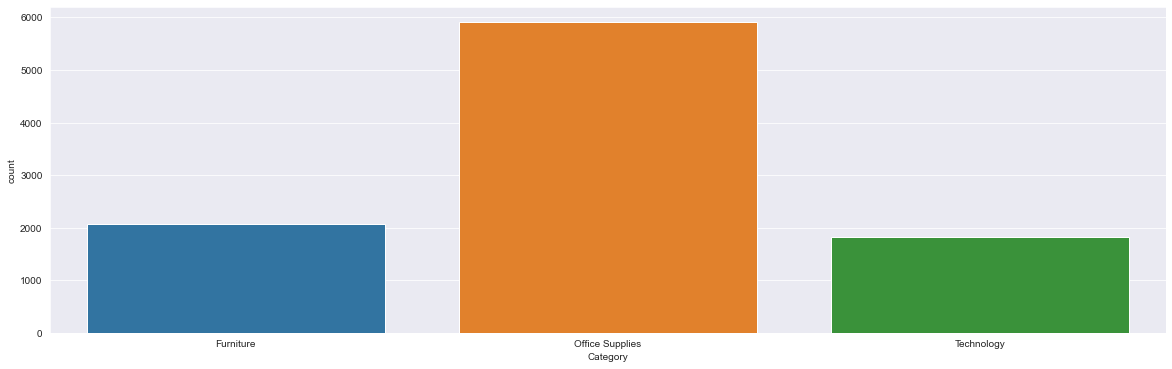

In [48]:
plt.figure(figsize=(20,6))
sns.countplot(x='Category',data=df)
#Out of all the categories office supplies have been ordered most.

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

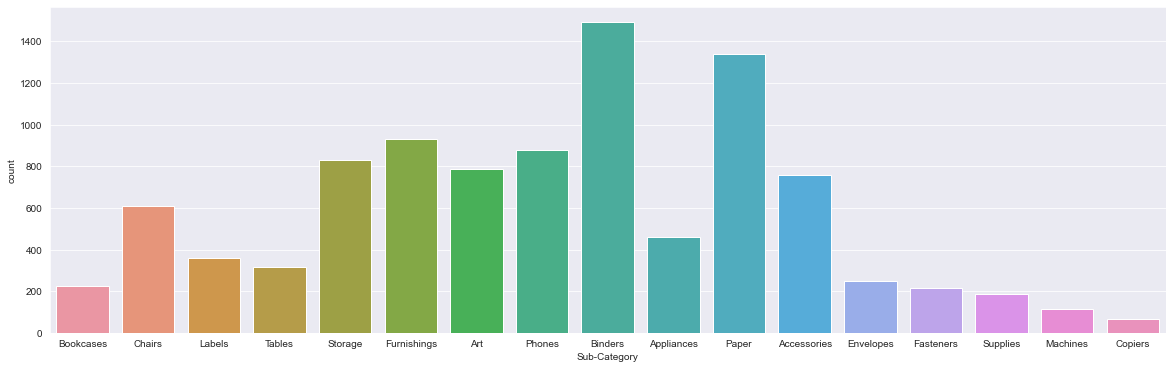

In [49]:
plt.figure(figsize=(20,6))
sns.countplot(x='Sub-Category',data=df)
#Among all the sub-category of the products Binders have been ordered mostly..

<AxesSubplot:xlabel='Region', ylabel='count'>

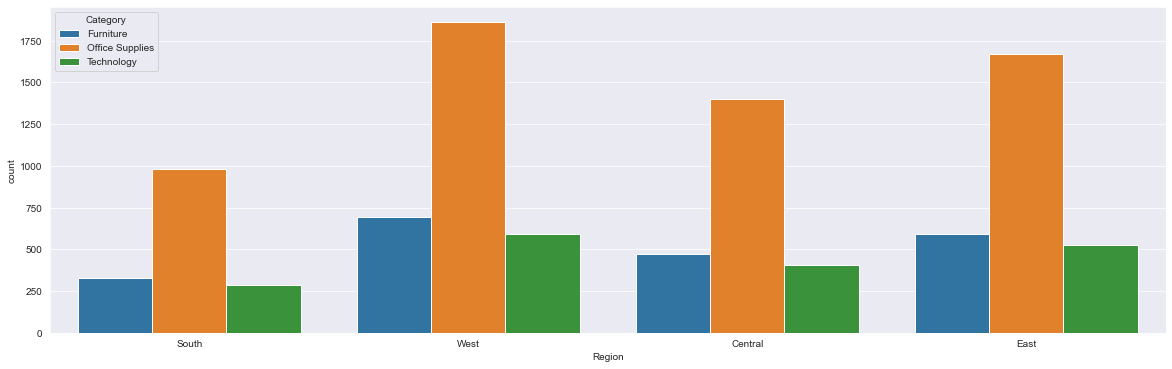

In [50]:
plt.figure(figsize=(20,6))
sns.countplot(x='Region',data=df,hue='Category')
#In all the regions Office Supplies are ordered mostly..

<AxesSubplot:xlabel='Region', ylabel='Sales'>

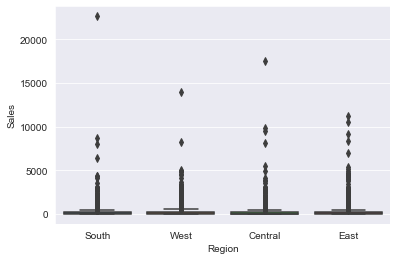

In [79]:
sns.boxplot(x='Region',y='Sales',data=df)
# The highest priced products are ordered from South zone which are denoted by the outliers..

<AxesSubplot:xlabel='Region', ylabel='Sales'>

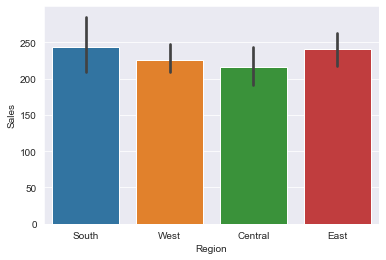

In [52]:
sns.barplot(x='Region',y='Sales',data=df)
#The average sales price is high on two regions : South and East

<AxesSubplot:xlabel='Sales', ylabel='Region'>

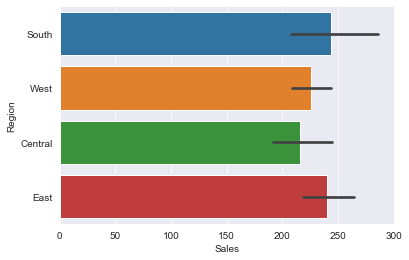

In [80]:
sns.barplot(y='Region',x='Sales',data=df)

<AxesSubplot:xlabel='Region'>

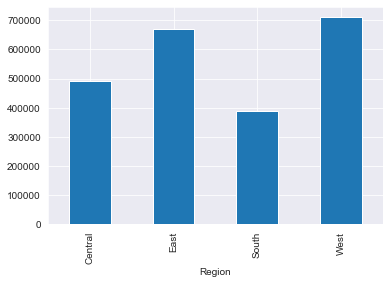

In [53]:
df.groupby(by='Region').sum()['Sales'].plot(kind='bar')
#In west region the total sum of sales price is the highest..

<AxesSubplot:xlabel='State'>

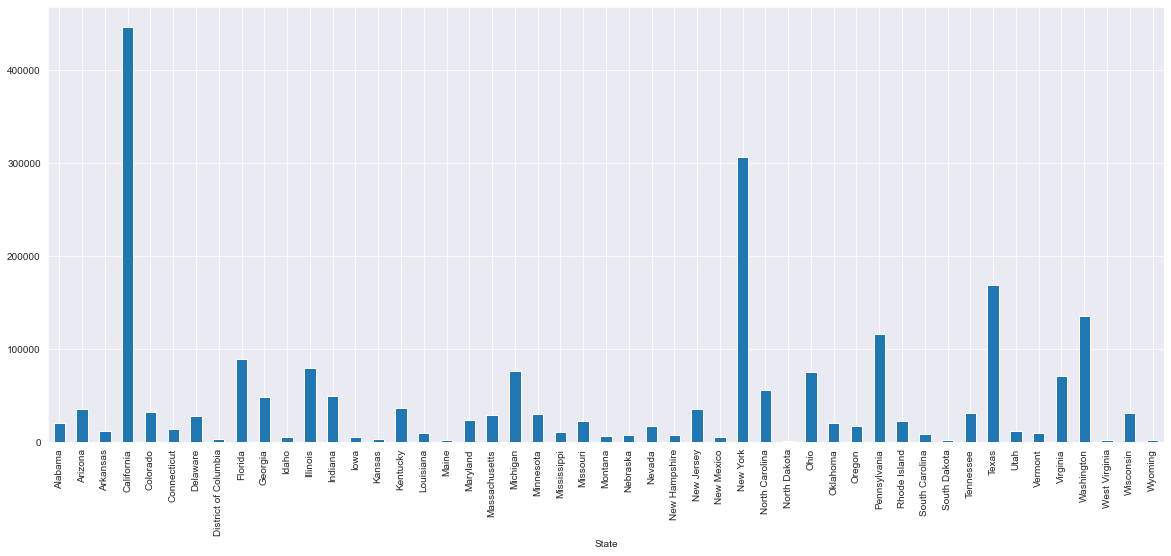

In [54]:
df.groupby(by='State').sum()['Sales'].plot(kind='bar',figsize=(20,8))
#In california the sum of sales of the products is the highest..

<AxesSubplot:xlabel='Category'>

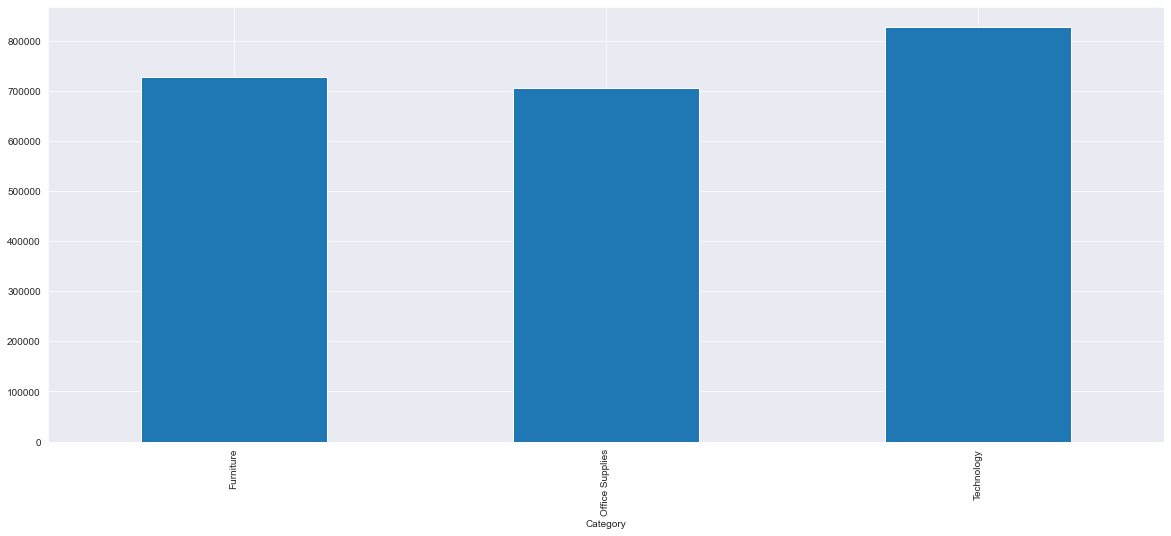

In [55]:
df.groupby(by='Category').sum()['Sales'].plot(kind='bar',figsize=(20,8))
#The total sum of sales is highest for Technological product categories.

<AxesSubplot:xlabel='Sub-Category'>

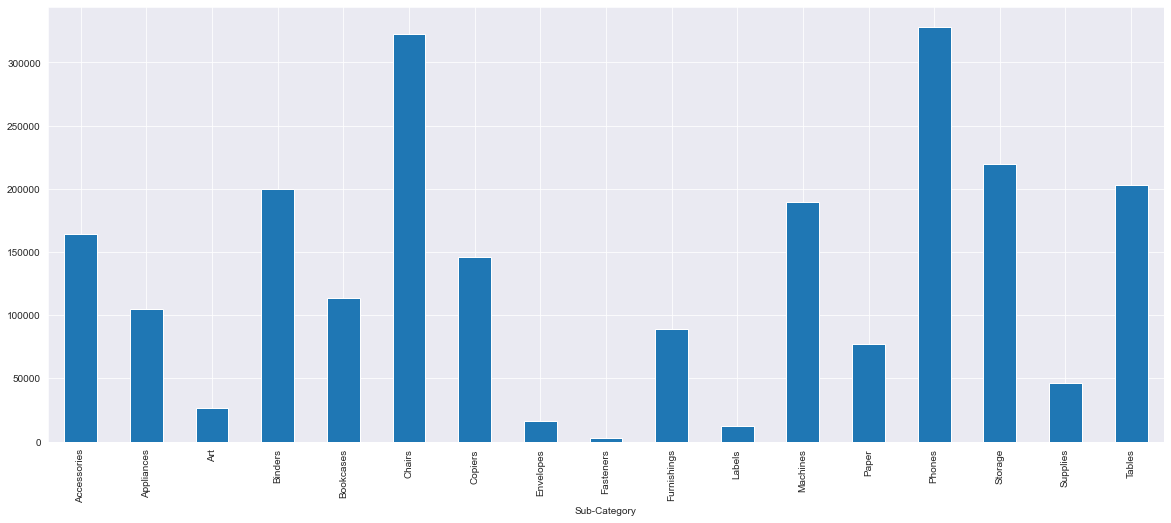

In [56]:
df.groupby(by='Sub-Category').sum()['Sales'].plot(kind='bar',figsize=(20,8))
#The total sum of sales is highest for two sub-categories : Chairs and Phones..

<AxesSubplot:xlabel='Product Name'>

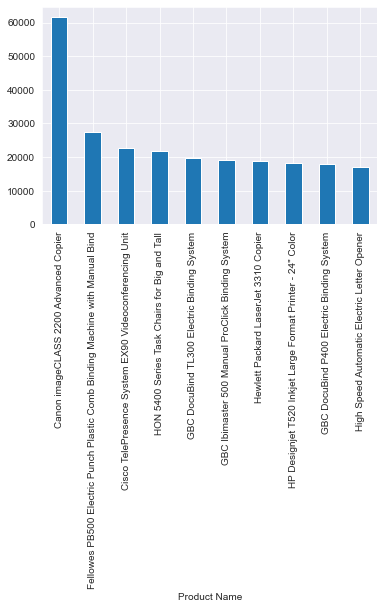

In [57]:
df.groupby(by='Product Name').sum()['Sales'].sort_values(ascending=False)[:10].plot(kind='bar')
#The product which has the highest sum of sales collectively is : Canon imageClass 2200 Advanced Copier.

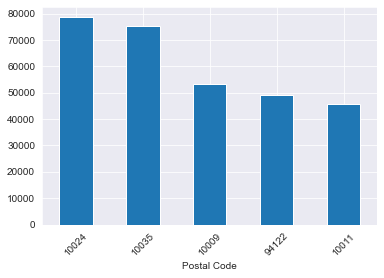

In [69]:
df.groupby(by='Postal Code').sum()['Sales'].sort_values(ascending=False)[:5].plot(kind='bar')
plt.xticks(rotation=45)
plt.show()
#From zipcode : 10024 the maximum amount of products are purchased.